In [6]:
#import relevent packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import cufflinks as cf
cf.go_offline()

In [9]:
#seeing the head
df.head()

,security_symbol,date,open,high,low,close,adjusted_close,volume
0,%5EGSPC,12-12-1980,127.36,129.98,127.15,129.23,129.23,39530000
1,%5EGSPC,15-12-1980,129.23,131.33,128.64,129.45,129.45,39700000
2,%5EGSPC,16-12-1980,129.45,131.22,128.33,130.6,130.60,41630000
3,%5EGSPC,17-12-1980,130.60,133.59,130.22,132.89,132.89,50800000
4,%5EGSPC,18-12-1980,132.89,135.9,131.89,133,133.00,69570000


In [10]:
#shape
df.shape

(32119, 8)

In [7]:
#read the dataset
df = pd.read_csv(r'dataset.csv')

In [16]:
df['security_symbol']=df['security_symbol'].replace(['%5EGSPC'],'Gspc')
df['security_symbol'].unique()

array(['Gspc', 'GOOG', 'AMZN', 'FB', 'AAPL'], dtype=object)

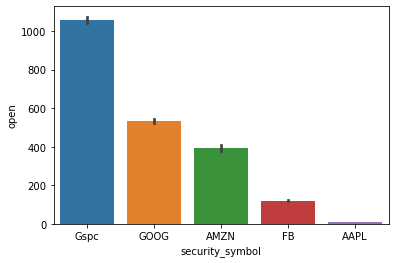

In [22]:
#visualization
sns.barplot(data=df,x='security_symbol',y='open')

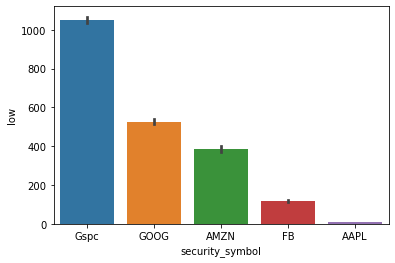

In [23]:
df['high'].unique()
sns.barplot(data=df,x='security_symbol',y='low')


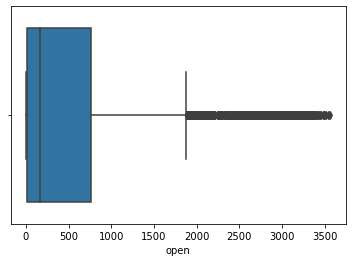

In [46]:
sns.boxplot(data=df,x='open')

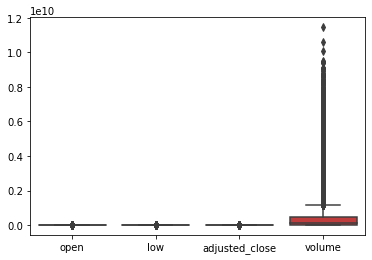

In [48]:
sns.boxplot(data=df)

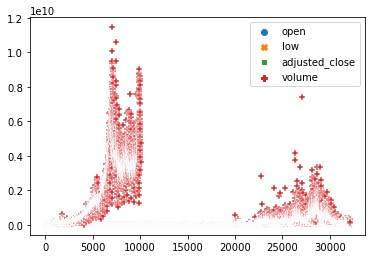

In [49]:
sns.scatterplot(data=df)

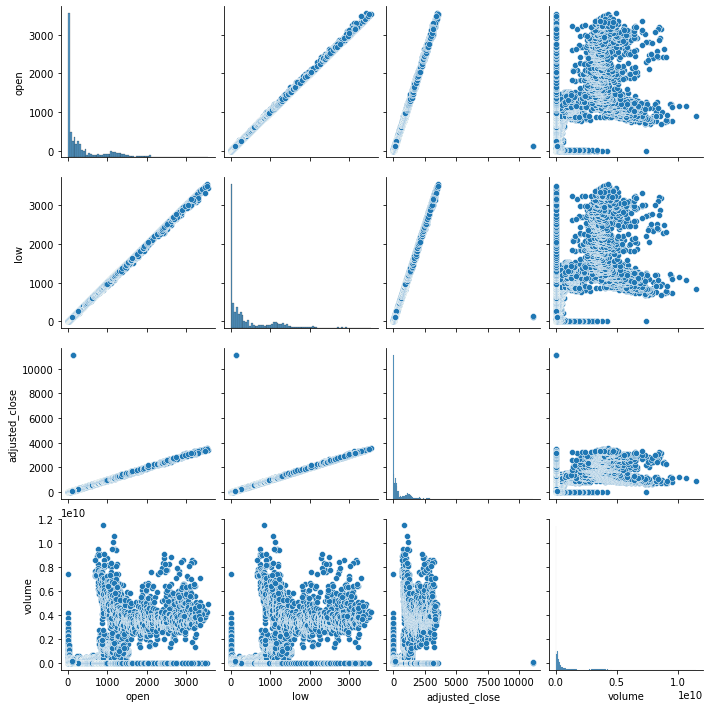

In [50]:
sns.pairplot(data=df)

In [39]:
#Categorical to numeric
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32119 entries, 0 to 32118
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   security_symbol  32119 non-null  object 
 1   date             32119 non-null  object 
 2   open             32119 non-null  float64
 3   high             32119 non-null  object 
 4   low              32119 non-null  float64
 5   close            32119 non-null  object 
 6   adjusted_close   32119 non-null  float64
 7   volume           32119 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.0+ MB


In [42]:
#preprocessing and treatment
df.isnull().sum()

security_symbol    0
date               0
open               0
high               0
low                0
close              0
adjusted_close     0
volume             0
dtype: int64

In [44]:
df.describe()

,open,low,adjusted_close,volume
count,32119.000000,32119.000000,32119.000000,3.211900e+04
mean,481.065097,477.289422,481.662774,6.636168e+08
std,685.542794,680.789868,690.842510,1.284478e+09
min,0.050000,0.050000,0.040000,7.900000e+03
25%,11.975000,11.755000,10.660000,9.823600e+06
50%,164.400000,163.070000,164.430000,1.327200e+08
75%,759.935000,753.685000,759.675000,4.771242e+08
max,3564.740000,3535.230000,11127.810000,1.145623e+10


In [58]:
df=df.drop('security_symbol',1)

In [78]:
df=df.drop('high',1)

In [84]:
#scandard scaler
c=StandardScaler().fit_transform(df)
c=pd.DataFrame(df)
print(c.head())

     open     low  adjusted_close    volume
0  127.36  127.15          129.23  39530000
1  129.23  128.64          129.45  39700000
2  129.45  128.33          130.60  41630000
3  130.60  130.22          132.89  50800000
4  132.89  131.89          133.00  69570000


Text(0, 0.5, 'cumulative explained variance')

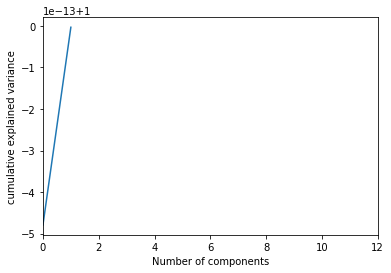

In [94]:
#dimensition reduction
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
df5=pca2.fit_transform(df)

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlim(0,12,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')

In [95]:
explained_variance = pca2.explained_variance_ratio_
explained_variance

array([1.00000000e+00, 4.75900727e-13])

In [68]:
#train test split
x_train=df.drop('volume',1)
y_train=df.volume

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,random_state=100,test_size=0.2)